---

# **Atividade** | Bank Customers Churn
Aluno [Vinicius](https://www.linkedin.com/in/andremarcosperez/)

---

**DESCRIÇÃO DOS ATRIBUTOS:**

* **RowNumber** —corresponde ao número do registro (linha) e não tem efeito na saída.
* **CustomerId** —contém valores aleatórios e não tem efeito na saída do cliente do banco.
* **Surname** —o sobrenome de um cliente não tem impacto em sua decisão de deixar o banco. **OK**
* **CreditScore** —pode afetar o churn de clientes, uma vez que um cliente com uma pontuação de crédito mais alta tem menos probabilidade de sair do banco. **OK**
* **Geography** —a localização de um cliente pode afetar sua decisão de deixar o banco. **OK**
* **Gender** —é interessante explorar se o gênero desempenha um papel na saída de um cliente do banco. **OK**
* **Age** —isso é certamente relevante, uma vez que os clientes mais velhos são menos propensos a deixar o banco do que os mais jovens. **OK**
* **Tenure** —refere-se ao número de anos em que o cliente é cliente do banco. Normalmente, os clientes mais velhos são mais fiéis e menos propensos a deixar um banco. **OK**
* **Balance** —também um indicador muito bom de rotatividade de clientes, pois as pessoas com saldo mais alto em suas contas têm menos probabilidade de sair do banco em comparação com aquelas com saldos mais baixos. **OK**
* **NumOfProducts** —refere-se ao número de produtos que um cliente comprou através do banco. **OK**
* **HasCrCard** —denota se um cliente tem ou não um cartão de crédito. Essa coluna também é relevante, pois as pessoas com cartão de crédito são menos propensas a sair do banco. **OK**
* **IsActiveMember** —clientes ativos são menos propensos a deixar o banco. **OK**
* **EstimatedSalary** —assim como no equilíbrio, as pessoas com salários mais baixos são mais propensas a sair do banco em comparação com aquelas com salários mais altos. **OK**
* **Exited** —se o cliente saiu ou não do banco. **OK**


## 1\. ETL - (Extração - Tratamento - Limpeza)

### 1.1\. Extração

In [1]:
import pandas as pd 

In [102]:
df_1 = pd.read_csv('Bank_Churn_Test_1.csv')
df_2 = pd.read_csv('Bank_Churn_Test_2.csv')

In [ ]:
df_1.head()

In [ ]:
df_2.head()

In [36]:
df_2.shape, df_1.shape

((10000, 4), (10000, 12))

In [103]:
dataset_origin =  pd.merge(df_2, df_1,  on=["CustomerId", "RowNumber"])
dataset_origin.head()

,RowNumber,CustomerId,Gender,Age,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Female,42.0,Hargrave,619,France,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Female,41.0,Hill,608,Spain,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Female,42.0,Onio,502,France,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Female,39.0,Boni,699,France,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Female,43.0,Mitchell,850,Spain,2.0,125510.82,1,1,1,79084.10,0


In [104]:
dataset_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Gender           9999 non-null   object 
 3   Age              9999 non-null   float64
 4   Surname          9999 non-null   object 
 5   CreditScore      10000 non-null  object 
 6   Geography        9999 non-null   object 
 7   Tenure           9999 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


### 2.1\. Tratamento


> Seguindo as recomendações na descrição dos atributos irei remover as colunas que não são relevantes.




In [105]:
dataset = dataset_origin.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).dropna()

* Convertedo colunas categóricas presentes no dataset ( pd.get_dummies ).

In [106]:
dataset['Geography'].unique(), dataset['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [107]:
dataset =  pd.get_dummies(dataset,  columns=['Geography', 'Gender']).iloc[:,1:]

* Convertendo a coluna CreditScore type Object.

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9999 non-null   object 
 1   Tenure             9999 non-null   float64
 2   Balance            9999 non-null   float64
 3   NumOfProducts      9999 non-null   int64  
 4   HasCrCard          9999 non-null   int64  
 5   IsActiveMember     9999 non-null   int64  
 6   EstimatedSalary    9999 non-null   float64
 7   Exited             9999 non-null   int64  
 8   Geography_France   9999 non-null   uint8  
 9   Geography_Germany  9999 non-null   uint8  
 10  Geography_Spain    9999 non-null   uint8  
 11  Gender_Female      9999 non-null   uint8  
 12  Gender_Male        9999 non-null   uint8  
dtypes: float64(3), int64(4), object(1), uint8(5)
memory usage: 751.9+ KB


In [109]:
dataset.CreditScore	= pd.to_numeric(dataset.CreditScore, errors="coerce").fillna(0).astype(int)

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9999 non-null   int64  
 1   Tenure             9999 non-null   float64
 2   Balance            9999 non-null   float64
 3   NumOfProducts      9999 non-null   int64  
 4   HasCrCard          9999 non-null   int64  
 5   IsActiveMember     9999 non-null   int64  
 6   EstimatedSalary    9999 non-null   float64
 7   Exited             9999 non-null   int64  
 8   Geography_France   9999 non-null   uint8  
 9   Geography_Germany  9999 non-null   uint8  
 10  Geography_Spain    9999 non-null   uint8  
 11  Gender_Female      9999 non-null   uint8  
 12  Gender_Male        9999 non-null   uint8  
dtypes: float64(3), int64(5), uint8(5)
memory usage: 751.9 KB


## 2\. ML - (Machine learning)

*  Pré-processamento de dados

In [112]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

### 2.1\. Avaliação de algoritmos de aprendizado de máquina.

* RandomForestClassifier



> As Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore.
**Fonte:** ([link](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/)).



In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

resultado_forest = []

for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i, stratify=y)

  classifier = RandomForestClassifier()
  classifier.fit(X_train, y_train)
  resultado_forest.append(accuracy_score(y_test, classifier.predict(X_test)))

In [118]:
print(resultado_forest)

[0.817, 0.8105, 0.821, 0.82, 0.813, 0.8195, 0.822, 0.821, 0.818, 0.8205, 0.8205, 0.826, 0.8285, 0.8145, 0.817, 0.8275, 0.815, 0.8235, 0.8185, 0.814, 0.8265, 0.8325, 0.8175, 0.8205, 0.829, 0.8255, 0.8205, 0.8315, 0.82, 0.822]


* GaussianNB




> É uma técnica de classificação baseado no teorema de Bayes com uma suposição de independência entre os preditores. Em termos simples, um classificador Naive Bayes assume que a presença de uma característica particular em uma classe não está relacionada com a presença de qualquer outro recurso. 
**Fonte:** ([link](https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/)).



In [119]:
from sklearn.naive_bayes import GaussianNB

resultado_naive_bayes = []

for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i, stratify=y)

  naive_bayes = GaussianNB()
  naive_bayes.fit(X_train, y_train)
  resultado_naive_bayes.append(accuracy_score(y_test, naive_bayes.predict(X_test)))

In [120]:
print(resultado_naive_bayes)

[0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965, 0.796, 0.7965, 0.796, 0.7965, 0.7965, 0.796, 0.7965, 0.7965, 0.7965, 0.7965, 0.7965]


#### 2.2\. Comparação de perfomance.

In [123]:
import numpy as np
from scipy import stats
import math

resultado_naive_bayes = np.array(resultado_naive_bayes)
resultado_forest = np.array(resultado_forest)

* Media dos resultados 

In [124]:
resultado_forest.mean(), resultado_naive_bayes.mean() 

(0.8210999999999999, 0.7964500000000003)

* Moda dos resultados



> Notamos ao lado direito a consistencia da taxa de acerto preditiva.
Onde RandonForest com (4) se mostrou menos consistente que os resultados de NaiveBayes... 



In [125]:
stats.mode(resultado_forest), stats.mode(resultado_naive_bayes)

(ModeResult(mode=array([0.8205]), count=array([4])),
 ModeResult(mode=array([0.7965]), count=array([27])))

* Variância



> Para averiguar essa inconsistencia verifiquei as taxas de devio dentro do resultado e foi avaliado que:

**RandomForest** - Tem a maior media de acerto acima de 80%

**NaiveBayes** - Tem a consistencia maior nos resultados em comparação, mas a media de acertos de 79%



In [126]:
np.set_printoptions(suppress=True)
np.var(resultado_forest),np.var(resultado_naive_bayes)

(2.8490000000000125e-05, 2.2499999999995037e-08)

In [127]:
np.min([2.8490000000000125e-05, 2.2499999999995037e-08])

2.2499999999995037e-08

* Desvio padrão

In [128]:
np.std(resultado_forest), np.std(resultado_naive_bayes)

(0.005337602458033019, 0.00014999999999998345)

In [129]:
np.min([0.005337602458033019, 0.00014999999999998345])

0.00014999999999998345

* Coeficiente de variação

In [131]:
stats.variation(resultado_forest) * 100

0.6500551038890536

### 2.3\. Validação cruzada

A técnica de validação cruzada serve para avaliar modelos de ML por meio de treinamento de vários modelos de ML em subconjuntos de dados de entrada disponíveis.

In [132]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [136]:
from sklearn.model_selection import cross_val_score, KFold

resultado_forest_cv = []

for i in range(30):
  kfold = KFold(n_splits= 10, shuffle = True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv= kfold)
  resultado_forest_cv.append(scores.mean())

* Media

In [137]:
print(resultado_forest_cv)

[0.8189814814814813, 0.821983883883884, 0.8182838838838838, 0.8188814814814815, 0.8223814814814814, 0.8190814814814814, 0.8179827827827827, 0.820782182182182, 0.8212811811811811, 0.8201843843843845, 0.8218804804804805, 0.8179818818818818, 0.8203835835835835, 0.819081981981982, 0.8197818818818818, 0.8196832832832834, 0.8203830830830832, 0.8219825825825826, 0.8203814814814814, 0.8207820820820821, 0.819282982982983, 0.8189825825825826, 0.8202842842842843, 0.8207829829829828, 0.8186796796796795, 0.8223840840840841, 0.8177820820820821, 0.8199811811811811, 0.8203832832832834, 0.8230837837837838]


### 2.4\. Diminuição da dispersão media utilizando a técnica de variação cruzada no modelo RandomForest.



> Utilizando a técnica de variação cruzada, conseguimos diminuir a variação do modelo RandomForest



* Coeficiente de variação

In [138]:
stats.variation(resultado_forest_cv) * 100, stats.variation(resultado_forest) * 100

(0.1715654968879453, 0.6500551038890536)

* Desvio padrão

In [139]:
np.std(resultado_forest_cv), np.std(resultado_forest)

(0.0014070528737649747, 0.005337602458033019)

## 3\. Final: visualização da perda de clientes:



> Com base nesses dados, podemos ver que o salario tem o maior impacto no churn de clientes, seguido pelo Score de credito e Saldo. Recomendaria uma avaliação no modelo de score usado pelo banco para fornecer credito para os seus clientes, talvez não esteja sendo tão eficiente



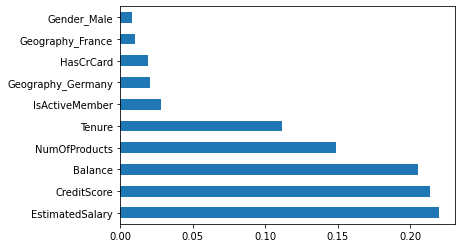

In [116]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## 4\. Simulando uma extração em caso de fonte API.

In [ ]:
import requests

resposta = requests.get('http://www.Bank_Churn.com')
print(resposta.status_code)

In [ ]:
import requests
from requests.exceptions import HTTPError


conteudo = None
URL = 'http://www.Bank_Churn.com/API'


try:
 resposta = requests.get(URL)
 resposta.raise_for_status()
except HTTPError as exc:
 print(exc)
else:
 conteudo = resposta.text
print(conteudo)